In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
gmr_df = pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv')
gmr_df.head()


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [3]:
# Categories available
categories_google_mobility = ['retail_and_recreation_percent_change_from_baseline',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'parks_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'workplaces_percent_change_from_baseline',
 'residential_percent_change_from_baseline']
categories_google_mobility

['retail_and_recreation_percent_change_from_baseline',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'parks_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'workplaces_percent_change_from_baseline',
 'residential_percent_change_from_baseline']

retail_and_recreation_percent_change_from_baseline


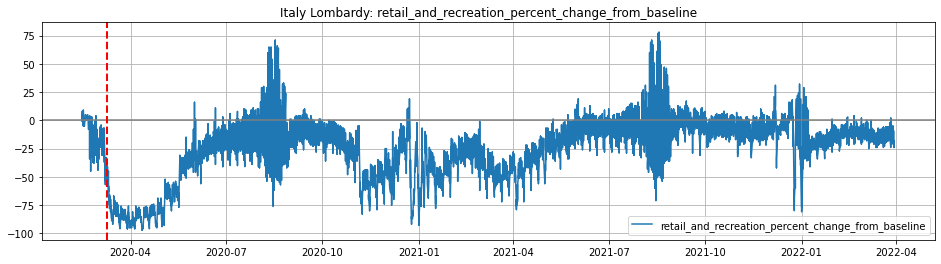

grocery_and_pharmacy_percent_change_from_baseline


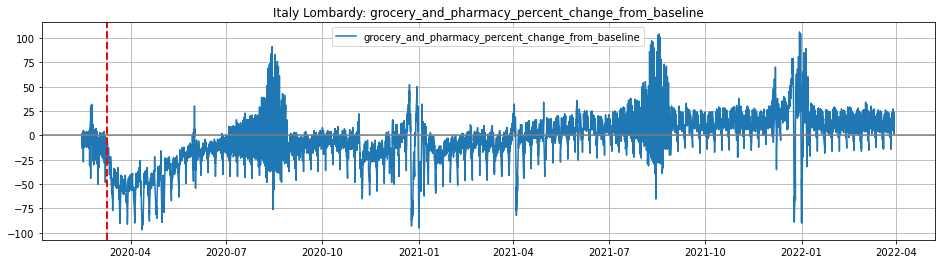

parks_percent_change_from_baseline


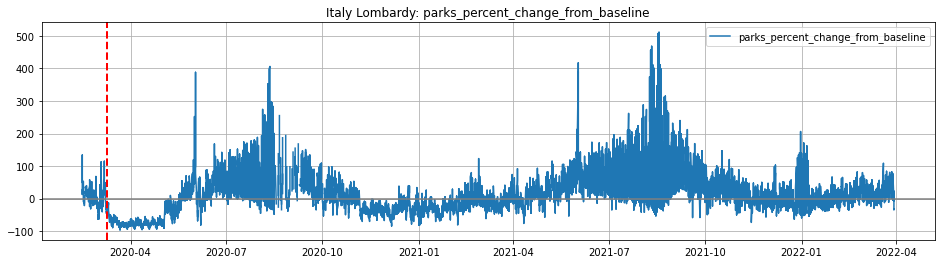

transit_stations_percent_change_from_baseline


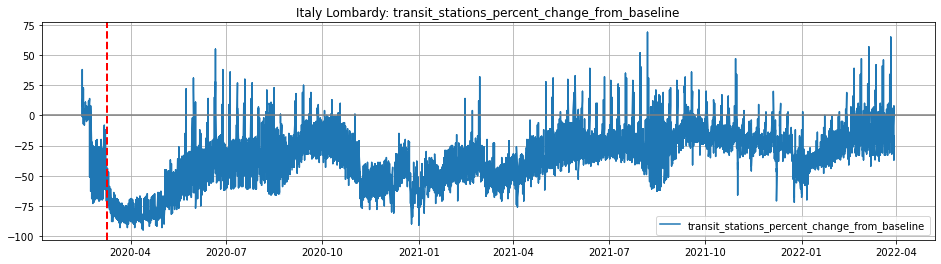

workplaces_percent_change_from_baseline


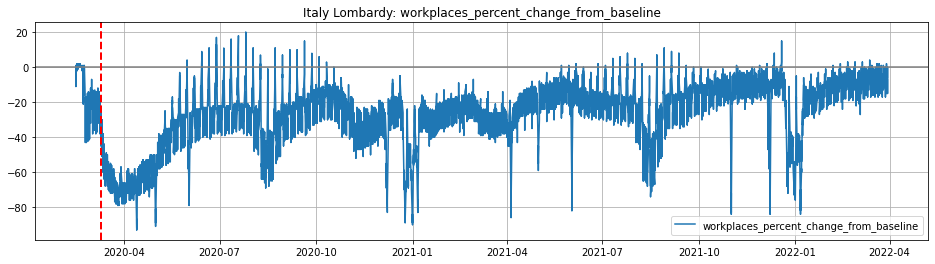

residential_percent_change_from_baseline


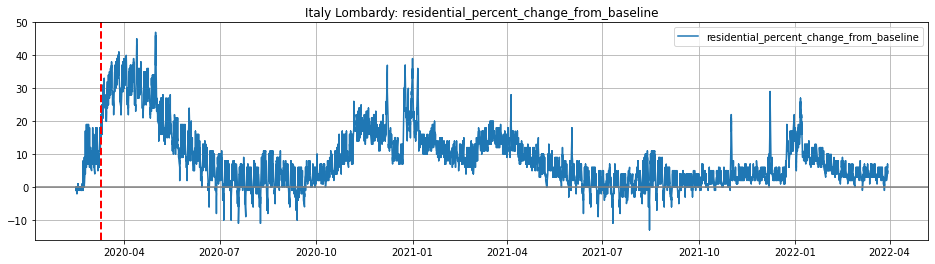

In [4]:
# let's get a subset of data from Lombardy, Italy
country = 'Italy'
region = 'Lombardy'
sub_df = gmr_df[(gmr_df['country_region']== country) & (gmr_df['sub_region_1']==region)]
sub_df.loc[:,'date'] = pd.to_datetime(sub_df.loc[:,'date'])
sub_df = sub_df.sort_values('date', ascending=True)
 
# let's plot all time series for this region
for group in categories_google_mobility:
    print(group)
     
    fig, ax = plt.subplots(figsize=(16, 4))
    plt.plot(sub_df['date'], sub_df[group], label=group)
    ax.axhline(y=0, color='gray')
    ax.axvline(pd.to_datetime('2020-03-10'), color='r', linestyle='--', lw=2)
    plt.title(country + ' '+ region + ': ' + group)
    plt.legend(loc='best') 
    plt.grid()
    plt.show()

In [11]:
### Let's find the best and worst states in the US

In [5]:
sub_df = gmr_df[(gmr_df['country_region']=='United States')]
sub_df.loc[:,'date'] = pd.to_datetime(sub_df.loc[:,'date'])
sub_df = sub_df.sort_values('date', ascending=True)
sub_df.head()


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
7248215,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
8927978,US,United States,Texas,Lamb County,NaN,NaN,48279.0,ChIJXU13GQJyAocRMBYz-_nZ3LU,2020-02-15,3.0,2.0,NaN,NaN,4.0,NaN
7593522,US,United States,Georgia,Tattnall County,NaN,NaN,13267.0,ChIJBZ2zCHWa-ogRQ5HHdyLG6jU,2020-02-15,10.0,7.0,NaN,NaN,0.0,NaN
8928728,US,United States,Texas,Lampasas County,NaN,NaN,48281.0,ChIJwUcgWMukWoYRF6Ooag1_zmA,2020-02-15,0.0,-3.0,NaN,NaN,-1.0,NaN
7592259,US,United States,Georgia,Sumter County,NaN,NaN,13261.0,ChIJPwlL9uNZ8ogRPkGrfuYIwSo,2020-02-15,1.0,1.0,NaN,NaN,2.0,NaN


retail_and_recreation_percent_change_from_baseline


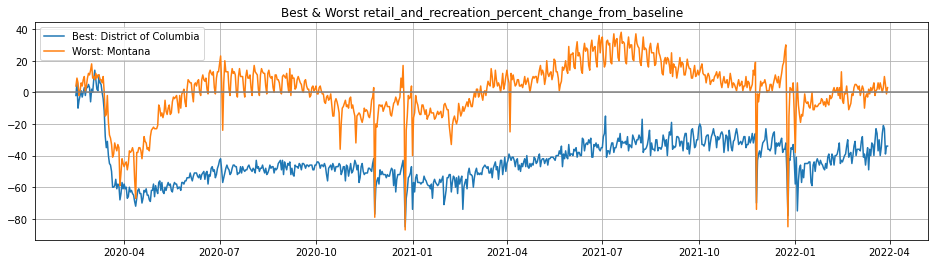

grocery_and_pharmacy_percent_change_from_baseline


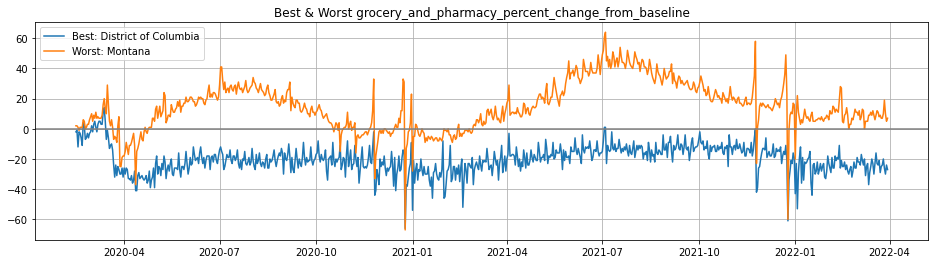

parks_percent_change_from_baseline


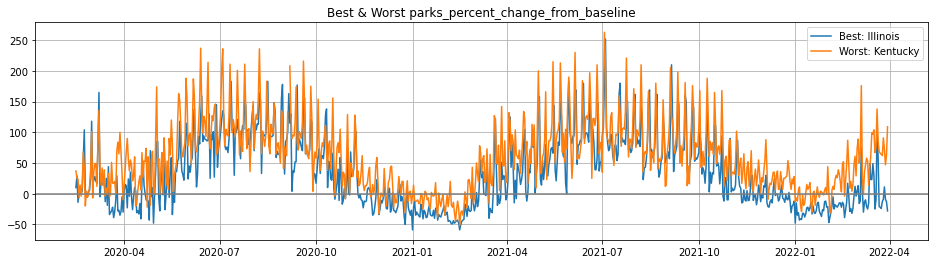

transit_stations_percent_change_from_baseline


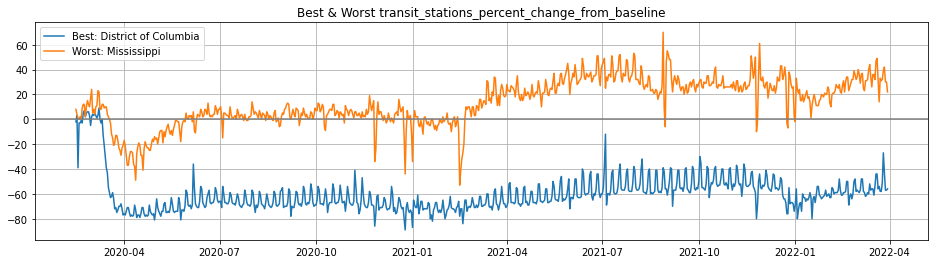

workplaces_percent_change_from_baseline


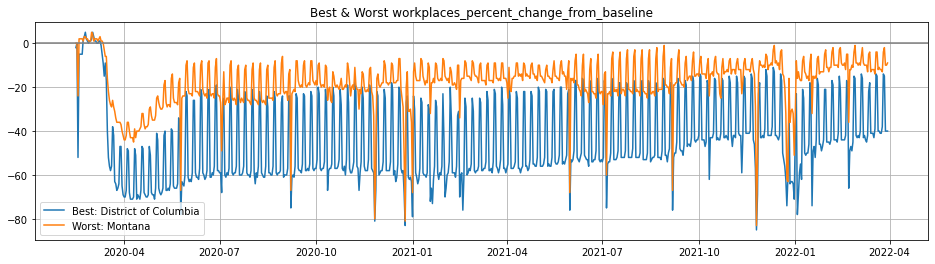

residential_percent_change_from_baseline


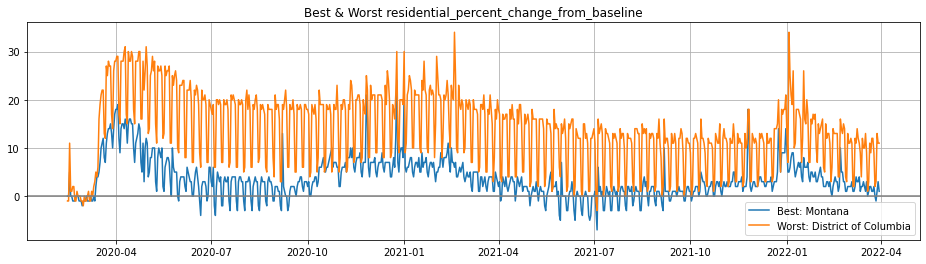

In [12]:
last_state_df = sub_df[sub_df['sub_region_2'].isna()].groupby(['sub_region_1']).last().reset_index()

for group in categories_google_mobility:
    print(group)
    min_dt = last_state_df[last_state_df[group]== last_state_df[['sub_region_1', group]][group].min()]
    max_dt = last_state_df[last_state_df[group]== last_state_df[['sub_region_1', group]][group].max()]
    
    fig, ax = plt.subplots(figsize=(16, 4))
    
    plt.plot(sub_df[(sub_df['sub_region_1'] == min_dt['sub_region_1'].values[0]) 
           & (sub_df['sub_region_2'].isna() )]['date'], 
             sub_df[(sub_df['sub_region_1'] ==  min_dt['sub_region_1'].values[0]) 
           & (sub_df['sub_region_2'].isna() )][group], label='Best: ' +  min_dt['sub_region_1'].values[0])
    plt.plot(sub_df[(sub_df['sub_region_1'] == max_dt['sub_region_1'].values[0]) 
            & (sub_df['sub_region_2'].isna() )]['date'], 
             sub_df[(sub_df['sub_region_1'] == max_dt['sub_region_1'].values[0]) 
            & (sub_df['sub_region_2'].isna() )][group], label='Worst: ' + max_dt['sub_region_1'].values[0])


    ax.axhline(y=0, color='gray')
    #ax.axvline(pd.to_datetime('2020-03-10'), color='r', linestyle='--', lw=2)
    plt.title('Best & Worst ' + group)
    plt.legend(loc='best') 
    plt.grid()
    plt.show()